In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
import sys

In [6]:
data = loadmat(os.path.join('data', 'ex7data2.mat'))
X = data['X']

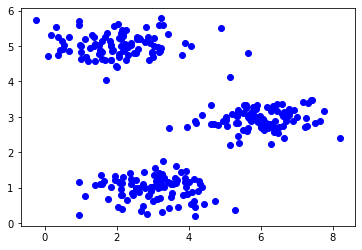

In [8]:
plt.scatter(X[:,0],X[:,1],color='blue')

In [20]:
def calc_distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [149]:
def initialize_centroids(X,k):
    centroids=[]
    centroids.append(X[np.random.randint(len(X)),:])
    for c in range(k-1):
        dist=[]
        for index in range(len(X)):
            d=sys.maxsize
            point=X[index,:]
            for cent in range(len(centroids)):
                temp_dist=calc_distance(point,centroids[cent])
                d=min(d,temp_dist)
            dist.append(d)
        dist=np.array(dist)
        next_cent=X[np.argmax(dist),:]
        centroids.append(next_cent)
    return centroids
        

In [150]:
centroids=instialize_centroids(X,3)

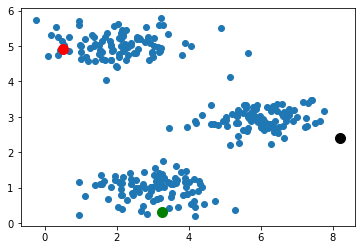

In [127]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[0][0],centroids[0][1],color='r',s=100)
plt.scatter(centroids[1][0],centroids[1][1],color='black',s=100)
plt.scatter(centroids[2][0],centroids[2][1],color='g',s=100)

In [134]:
def find_clusters(X,centroids):
    clusters=[]
    for i in range(len(X)):
        d=sys.maxsize
        point=X[i,:]
        for cent in range(len(centroids)):
            temp_dist=calc_distance(point,centroids[cent])
            if temp_dist<d:
                d=temp_dist
                index=cent
        clusters.append(index)
    return np.array(clusters)


In [142]:
clusters=find_clusters(X,centroids)

In [146]:
def update_means(X,centroids,clusters):
    unique_clusters=np.unique(np.array(clusters))
    for i in range(len(unique_clusters)):
        cluster=X[clusters==unique_clusters[i]]
        centroids[unique_clusters[i]]=cluster.mean(axis=0)
    return centroids

In [147]:
updated_centroids=update_means(X,centroids,clusters)

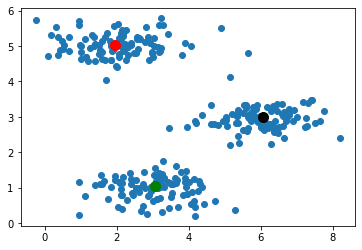

In [148]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[0][0],centroids[0][1],color='r',s=100)
plt.scatter(centroids[1][0],centroids[1][1],color='black',s=100)
plt.scatter(centroids[2][0],centroids[2][1],color='g',s=100)

In [178]:
def make_clusters(iterations,k,X):
    centroids=initialize_centroids(X,k)
    clusters=find_clusters(X,centroids)
    for i in range(iterations):
        belongs_to=clusters.copy()
        centroids=update_means(X,centroids,clusters)
        clusters=find_clusters(X,centroids)
        if np.array_equal(clusters,belongs_to):
            break
    return clusters,centroids

In [179]:
clusters,centroids=make_clusters(1000,3,X)

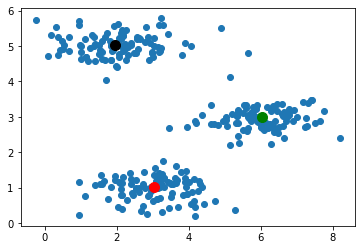

In [180]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[0][0],centroids[0][1],color='r',s=100)
plt.scatter(centroids[1][0],centroids[1][1],color='black',s=100)
plt.scatter(centroids[2][0],centroids[2][1],color='g',s=100)

In [202]:
def elbow_method(X,centroids,clusters,k):
    wcss=[]
    for i in range(1,k+1):
        clusters,centroids=make_clusters(100,i,X)
        unique_cl=np.unique(clusters)
        for i in range(len(centroids)):
            sum_cl=0
            wcss_temp=[]
            data=X[clusters==unique_cl[i]]
            for j in range(len(data)):
                sum_cl+=np.sum((data[j,:]-centroids[unique_cl[i]])**2)
            wcss_temp.append(sum_cl)
        wcss.append(sum(wcss_temp))
        
    return wcss
        

In [207]:
wcss=elbow_method(X,centroids,clusters,7)

In [208]:
wcss

[1957.6547206251662,
 813.0546465079929,
 92.65879264055492,
 24.89664451749874,
 29.095513271130976,
 19.475461366163927,
 2.1616772375147013]

Text(0, 0.5, 'wcss')

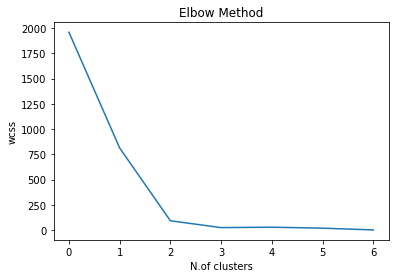

In [209]:
plt.plot(np.arange(len(wcss)),wcss)
plt.title('Elbow Method')
plt.xlabel('N.of clusters')
plt.ylabel('wcss')